In [1]:
import re,math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import pearsonr
from scipy.optimize import leastsq


data1 = pd.read_csv(r'细胞间相似性（皮尔森）.csv',engine='python')
# 细胞系-细胞系
high_data = data1.set_index(data1.loc[:,"Unnamed: 0"]).drop(["Unnamed: 0"], axis=1)
# 药物对-细胞系
data2 = pd.read_csv('label_gai.csv')
# 选取细胞系名称
columns = list(data2.columns[1:])
# 删去对应行后的字典
dict_high_lines = {}
count = 0
for i in high_data.index:
    y = list(high_data.loc[:,i])
    y.pop(count)
    count += 1  
    dict_high_lines[i] = y
# 分离x y数据构造字典
dict_columns = {}
for i in columns: 
    
    # b
    y = data2.loc[:,i]
    
    # A
    temp = []
    for j in columns:
        if j != i:
            temp.append(j)
    m = data2.loc[:, temp[0]]
    tp = [m]
    for j in temp[1:]:
        tp.append(data2.loc[:, j])
    x = pd.DataFrame(tp).T
    
    tp = []
    for j in columns:
        if i != j:
            tp.append(j)
    df = pd.DataFrame(dict_high_lines[i], index=tp)
    df.sort_values(by=0 , inplace=True, ascending=True)
    max_l = df.index[-13:]
    tp = []
    for j in max_l:
        tp.append(data2.loc[:, j])
    max_5x = pd.DataFrame(tp).T
    
    # 存储
    data = {
        "x": x,
        "y": y,
        "max_relevance": max_l,
        "max_5x": max_5x
    }
    dict_columns[i] = data
# 删去对应行后的字典
dict_high_lines = {}
count = 0
for i in high_data.index:
    y = list(high_data.loc[:,i])
    y.pop(count)
    count += 1
    dict_high_lines[i] = y

    tp = []
    for j in columns:
        if i != j:
            tp.append(j)
    df = pd.DataFrame(dict_high_lines[i], index=tp)
    df.sort_values(by=0 , inplace=True, ascending=True)
    
    max_l = df.index[-5:] 
    tp = []
    for j in max_l:
        tp.append(high_data.loc[j, :])
    max_5y = list(pd.DataFrame(tp).T.loc[[i]].values)[0]
    
    data = {
        "max_relevance": max_l,
        "y": y,
        "high_5": max_5y
    }
    dict_high_lines[i] = data
    
# 筛选每个细胞系前5细胞系得分平均值大于0.92的细胞系
# end_score = []
# name_dict_high_lines = []
# for elem in dict_high_lines:
#     end_score.append(dict_high_lines[elem]['high_5'].mean())
#     name_dict_high_lines.append(elem)
# dict_high_lines_temp = {}
# for score in end_score:
#     if score >= 0.90:
#         dict_high_lines_temp[name_dict_high_lines[end_score.index(score)]] = dict_high_lines[name_dict_high_lines[end_score.index(score)]]
# dict_high_lines = dict_high_lines_temp.copy()

cell_dict_columns=dict_columns
cell_dict_high_lines=dict_high_lines

In [2]:
data1 = pd.read_excel(r'pcbi.1006752.s002.xlsx', sheet_name="Sheet1",index_col='Drug').drop('SMILES',axis=1)
data2 = pd.read_excel(r'Label_synergy4000.xlsx')
# 合并drugA和drugB为一列作为索引
temp1 = []
index_l = []
for index,row in data2.iterrows():
    ct = np.array(data1.loc[row["DrugA"],:]) + np.array(data1.loc[row["DrugB"],:])
    tp = []
    for i in ct:
        if i >= 1:
            tp.append(1)
        else:
            tp.append(0)
    temp1.append(tp)
    index_l.append((row["DrugA"],row["DrugB"]))
# 两组数据的tanimoto计算
def tanimoto(p,q):
    tep1=0
    tep2=0
    lenthp=int(len(p))
    for i in range(lenthp):
        a=p[i]        
        b=q[i]
        if (a==1)|(b==1):
            tep1=tep1+1
        if (a==1)&(b==1):
            tep2=tep2+1 
    c=float(tep2 / tep1)        
    return c
# 相互之间做一次tanimoto
temp=[]  
for i in temp1:
    tmp=[]   
    a=np.array(i) #取出一组值
    for j in temp1:
        b=np.array(j)    #取出一组值
        tp=tanimoto(a,b)
        tmp.append(tp)
    temp.append(tmp)
Tanimoto=pd.DataFrame(temp,columns=index_l,index=index_l)
# 获取栏目数组
ttpp = []
for i in list(Tanimoto.columns):
    ttpp.append(str(i)[1:-1])
data2 = pd.DataFrame(data2.iloc[:,2:].T.values, columns=list(ttpp))
columns = data2.columns
# 删去对应行后的字典
dict_lines = {}
count = 0
ct = 0
for i in Tanimoto.index:
    y = list(Tanimoto.iloc[:,ct])
    y.pop(count)
    count += 1
    dict_lines[columns[ct]] = y
    ct += 1
# 分离x y数据构造字典
dict_columns = {}
for i in columns: 
    
    # b
    y = data2.loc[:,i]
    
    # A
    temp = []
    for j in columns:
        if j != i:
            temp.append(j)
    m = data2.loc[:, temp[0]]
    tp = [m]
    for j in temp[1:]:
        tp.append(data2.loc[:, j])
    x = pd.DataFrame(tp).T
    

    tp = []
    for j in columns:
        if i != j:
            tp.append(j)
    df = pd.DataFrame(dict_lines[i], index=tp)
    df.sort_values(by=0 , inplace=True, ascending=True)
    max_l = df.index[-5:]
    tp = []
    for j in max_l:
        tp.append(data2.loc[:, j])
    max_5x = pd.DataFrame(tp).T
    
    # 存储
    data = {
        "x": x,
        "y": y,
        "max_relevance": max_l,
        "max_5x": max_5x
    }
    dict_columns[i] = data
# 删去对应行后的字典
dict_high_lines = {}
count = 0
cct = 0
for i in Tanimoto.index:
    y = list(Tanimoto.iloc[:,cct])
    y.pop(count)
    count += 1
    dict_high_lines[str(i)[1:-1]] = y

    tp = []
    for j in columns:
        if str(i)[1:-1] != j:
            tp.append(j)
    df = pd.DataFrame(dict_high_lines[str(i)[1:-1]], index=tp)
    df.sort_values(by=0 , inplace=True, ascending=True)

    max_l = df.index[-5:] 
    tp = []
    for j in max_l:
        tp.append(Tanimoto.iloc[list(columns).index(j), :])
    max_5y = list(pd.DataFrame(tp).T.iloc[[list(columns).index(str(i)[1:-1])]].values)[0]

    data = {
        "y": y,
        "max_relevance": max_l,
        "high_5": max_5y
    }
    dict_high_lines[str(i)[1:-1]] = data
    cct += 1

# 筛选每个药物对前5药物对得分平均值大于0.90的药物对
# end_score = []
# name_dict_high_lines = []
# for elem in dict_high_lines:
#     end_score.append(dict_high_lines[elem]['high_5'].mean())
#     name_dict_high_lines.append(elem)
# dict_high_lines_temp = {}
# for score in end_score:
#     if score >= 0.90:
#         dict_high_lines_temp[name_dict_high_lines[end_score.index(score)]] = dict_high_lines[name_dict_high_lines[end_score.index(score)]]
# print(len(dict_high_lines_temp))
# dict_high_lines = dict_high_lines_temp.copy()

drug_dict_columns=dict_columns
drug_dict_high_lines=dict_high_lines

In [3]:
def dictW_C(alpha):
    # 运算构造参数W字典 
    dict_W = {}
    for elem in cell_dict_high_lines:
        r = np.array(cell_dict_high_lines[elem]["high_5"])
        W1= pow((1-r),2)
        W = np.exp(-W1/(2*pow(alpha,2)))
        dict_W[elem] = W
    return dict_W

def dictW_D(alpha):
    # 运算构造参数W字典 
    dict_W = {}
    for elem in drug_dict_high_lines:
        r = np.array(drug_dict_high_lines[elem]["high_5"])
        W1= pow((1-r),2)
        W = np.exp(-W1/(2*pow(alpha,2)))
        dict_W[elem] = W
    return dict_W

def dictr(dict_W):
    # 均方误差字典 （MSE=
    # r = max(|A×W - b|)
    dict_r = {}
    for elem,w in zip(dict_columns, dict_W):
        A = np.array(dict_columns[elem]["max_5x"].values) # x----->max_5x
        b = np.array(dict_columns[elem]["y"].values)
        W = dict_W[w]
        temp1 = np.dot(A,W) - b
        temp2 = np.square(temp1)
        temp3 = np.mean(temp2)
        dict_r[w] = temp3
    return dict_r

def dirlist(dict_r):
    #计算误差平方和    
    dir_list = []
    for elem in dict_r:
        dir_list.append(np.sqrt(dict_r[elem]))
    return dir_list

In [4]:
dev=10000

In [5]:
np.linspace(0.1,0.15,6)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15])

In [6]:
np.array([0.5])

array([0.5])

In [13]:
alin=np.array([0.30])
blin=np.array([0.22])
for alpha in alin:
    for Betta in blin:
        print(alpha)
        print(Betta)
        print()
        cell_dict_W = dictW_C(alpha)
        drug_dict_W = dictW_D(Betta)
    
        data1 = pd.read_excel(r'pcbi.1006752.s002.xlsx', sheet_name="Sheet1",index_col='Drug').drop('SMILES',axis=1)
        data2 = pd.read_excel(r'Label_synergy4000.xlsx')
        data2_columns = data2.columns[2:]
    
        # 结构  {名字： 名字列表， 权重： 权重列表} 顺序对应
        dict_molecule_cell = {}
        for elem in cell_dict_high_lines:
            dict_molecule_cell[elem] = []
            dict_molecule_cell[elem].append(cell_dict_columns[elem]["max_relevance"][-13:])
            dict_molecule_cell[elem].append(cell_dict_W[elem][-13:])
    
        dict_molecule_drug = {}
        for elem in drug_dict_high_lines:
            dict_molecule_drug[elem] = []
            dict_molecule_drug[elem].append(drug_dict_columns[elem]["max_relevance"][-5:])
            dict_molecule_drug[elem].append(drug_dict_W[elem][-5:])
    
        # 拆分索引获取每行对应的drugA和drugB
        drugA = []
        drugB = []
        for i in dict_molecule_drug:
            drugA.append(i.split(", ")[0][1:-1])
            drugB.append(i.split(", ")[1][1:-1])
    
        #原始数据中删除药物对得分低于0.90的行
        temp = []
        for index,row in data2.iterrows():
            status = 0
            for i,j in zip(drugA, drugB):
                if i == row[0] and j == row[1]:
                    status = 1
            if status == 1:
                temp.append(row)
        data22 = pd.DataFrame(temp)
        data22=data2
    
        # 获取得分高的细胞系名称组
        cells = []
        for i in dict_molecule_cell:
            cells.append(i)
        cells.extend(data22.columns[0:2])
    
    
        # 从原始数据中按列取得分高的细胞系
        temp = []
        for column,line in data22.iteritems():
            if column in cells:
                temp.append(line)
        data222 = pd.DataFrame(temp).T
    
        # 筛选结果合并drugA和drugB
        tptt = []
        for i,j in zip(data222['DrugA'], data222['DrugB']):
            tptt.append(f"'{i}', '{j}'")
        data222 = pd.DataFrame(data222.iloc[:,2:].values,index=tptt,columns=data222.columns[2:])
    
    
        # 原始数据合并drugA和drugB
        tptt = []
        for i,j in zip(data2['DrugA'], data2['DrugB']):
            tptt.append(f"'{i}', '{j}'")
        data3 = pd.DataFrame(data2.iloc[:,2:].values,index=tptt,columns=data2.columns[2:])
        data2 = data3.copy()
    
        # 预测筛选后的药物对与细胞系的协同得分
        result_df = []
        for i in data222.index:
            tp = []
            for k in data222.columns[0:]:
                molecule = 0
                denominator = 0
                a = dict_molecule_cell[k][0]
                b = dict_molecule_drug[i][0]
                cw = dict_molecule_cell[k][1]
                dw = dict_molecule_drug[i][1]
                for m,ccw in zip(a,cw): # 细胞系   名字  权重
                    for n,ddw in zip(b,dw): # 药物对   名字   权重
                        # 分子子项 = 细胞系权重 × data2对应名字的值 ×药物对权重
                        temp_molecule = ccw*data2[data2.index==n][m].values[0]*ddw
                        # 分母子项 = 细胞系权重 × 药物对权重
                        #temp_denominator = ccw*ddw
                        temp_denominator=1
                        molecule += temp_molecule
                        denominator += temp_denominator
                result = molecule / denominator
                tp.append(result)
            result_df.append(tp)
    
        sens=pd.DataFrame(np.array(result_df),index = data222.index, columns=data222.columns)
    
        MSE=pow(data222-sens,2).sum().sum()/(sens.shape[0]*sens.shape[1])
        

        #误差判断
        if(MSE>=dev):
            continue
        else:
            dev=MSE
            al=alpha
            bl=Betta

dev

0.3
0.22



473.78789478915405

In [8]:
MSE

473.78789478915405

In [9]:
al

0.28

In [10]:
bl

0.17

In [11]:
dev

473.78789478915405

In [53]:
data222

,A2058_SKIN,A2780_OVARY,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT144_SKIN,HT29_LARGE_INTESTINE,KPL1_BREAST,LOVO_LARGE_INTESTINE,MDAMB436_BREAST,...,NCIH460_LUNG,OVCAR4_OVARY,RPMI7951_SKIN,SKMEL30_SKIN,SKMES1_LUNG,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE
"'VINORELBINE', 'SUNITINIB'",-13.2,-4.03,10.5,-15.6,16.3,9.68,-20.3,11.3,2.6,-3.48,...,6.71,-9.62,-22.5,4.7,2.82,13.8,-5.77,-14.4,-10.7,-16.8
"'AZD1775', 'MK-4827'",32.8,9.07,7.98,-0.744,-1.65,9.04,8.55,4.71,9.09,16.5,...,5.53,60.1,18.3,13.8,15,4.26,17.8,11,21.8,4.64
"'VINORELBINE', 'DASATINIB'",0.844,40.1,39.4,-14.9,-0.248,-35.8,-1.34,22,53.8,16.2,...,30.9,20.8,10.3,-14.4,10.2,31.3,20.9,45.2,-15.9,-10.4
"'VINBLASTINE', 'MK-4827'",-13.4,-11.4,-12.1,-33.5,11.7,-2.44,-10.1,7.93,-2.88,-1.83,...,3.17,-16.9,-5.58,-3.45,-7.51,30.9,-21.7,-48.8,-1.63,16.4
"'VINBLASTINE', 'AZD1775'",6.79,1.42,-13.3,-7.45,3.48,11.8,-6.54,11.2,-0.715,0.118,...,-9.21,-0.422,-6.46,-19.5,-11.1,20.4,-2.7,-23.2,16.6,-10.6
"'MK-4827', 'DASATINIB'",15.1,65.1,20.3,5.4,15.5,-38.1,26.4,15.1,34.3,28.9,...,10.9,77.7,17.6,-23.3,0.925,37.1,19,-15.4,4.86,29.8
"'AZD1775', 'TOPOTECAN'",5.72,4.65,11.3,3.24,3.24,9.41,11.7,11.8,1.53,3.96,...,-17.1,40.6,-6.69,13.8,-11.4,17.1,7.67,1.82,4.17,0.328
"'VINORELBINE', 'AZD1775'",-15.9,-7.69,-5.44,-13.7,6.88,5.33,-19.9,7.21,3.38,-0.893,...,-4.12,-13.2,-12,-6.01,-7.9,-0.374,-11.2,-13.6,-1.62,-33.1
"'SUNITINIB', 'TOPOTECAN'",-7.88,2.12,12.7,2.27,5.95,-6.78,-17.9,16.2,-2.98,-6.77,...,-0.448,-33.1,-6.24,6.92,-5.01,5.24,-5.68,-23.3,-4.97,6.64
"'VINBLASTINE', 'DINACICLIB'",-17.1,-20.2,-16.6,-32.2,0.731,-13.6,-23.8,0.243,-20.3,-21.7,...,-15.3,-18.6,-11.1,-9.59,-27.5,12.7,-19.2,-60,-2.47,-17


In [12]:
sens

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
"'MK-5108', 'SORAFENIB'",-3.867893,4.734536,1.415636,0.412920,-3.406519,3.510484,0.001651,0.679283,2.365752,1.164938,...,2.143186,0.551627,1.179542,-0.246160,-2.857976,-3.030262,3.836639,-0.156182,-3.450401,-1.281853
"'VINORELBINE', 'SUNITINIB'",-4.215289,-6.463504,-6.223887,-2.282789,-4.546688,-5.722029,-7.256129,-6.336816,-4.375448,-4.563300,...,-1.860516,-0.705418,-3.614175,-6.437733,-1.600372,-7.522301,-9.586377,-4.099929,-3.060641,-1.567028
"'SUNITINIB', 'MK-8776'",3.859652,7.207064,6.042330,3.739701,8.090444,7.174759,5.153643,6.178404,5.016690,4.822891,...,5.578583,5.272788,5.497286,6.506737,6.715124,5.587286,4.392978,4.474410,3.277674,3.558502
"'5-FU', 'DINACICLIB'",-2.077653,-0.944195,-2.981593,-3.186426,0.413224,-1.944241,-0.727207,-1.531222,-1.995569,-2.470386,...,-1.604142,-4.277824,-1.168992,-2.114947,0.598055,-1.278030,-6.345592,-0.159103,-6.292065,-5.333617
"'SUNITINIB', 'MK-2206'",1.960633,6.615229,5.446603,3.299019,5.437160,5.966019,3.140850,4.772588,4.185918,4.067576,...,4.604177,4.116309,4.584168,4.705505,4.712538,3.851712,5.346420,3.897677,2.703450,2.971945
"'PACLITAXEL', 'BEZ-235'",6.698599,6.940717,5.137363,8.953761,-5.089088,6.346022,-5.039825,-8.901282,9.518566,8.134697,...,7.492815,9.294508,7.723600,-5.410295,4.214372,2.518773,5.535357,5.375760,6.858891,9.544321
"'MK-2206', 'DINACICLIB'",-0.738976,0.933334,-4.829215,-2.898671,0.061067,0.804531,-1.057991,2.536372,-1.480008,-0.181525,...,-3.341772,-5.304347,-1.174610,2.895624,-1.400563,0.336219,-3.659226,0.708322,-6.850963,-5.260024
"'MK-4827', 'MK-8776'",5.247750,7.089549,8.195182,-2.223112,5.878633,4.252643,-1.169635,3.534923,5.560391,6.694369,...,12.594690,4.468015,8.029484,2.521647,11.846168,2.128880,-3.360217,13.397906,-0.037004,-2.134447
"'VINORELBINE', 'DINACICLIB'",-0.670194,-2.997264,-7.925533,-2.737328,-4.352456,-2.384621,-5.098406,-4.789758,-1.420430,-2.110091,...,-2.234358,-4.806369,-2.644282,-6.212828,-0.140202,-2.477985,-7.969230,-1.488261,-3.420494,-0.940178
"'MK-5108', 'MK-8776'",1.587225,6.789356,1.699697,3.516916,-0.591831,4.264441,1.629278,2.603411,4.077840,5.137841,...,2.854620,1.460732,0.999512,0.434756,2.129770,2.890001,1.950255,3.588892,-3.205437,-0.956453


0.1,0.1,437.41828256391517
0.3,0.3,438.93875271344956
0.15,0.1,436.8784313461875
0.2,0.1,436.71002060414264
0.3,0.1,436.71002060414264
0.5,0.1,436.539864386571

0.1 0.11 494.0848189570811
0.28 0.17 473.78789478915405

In [54]:
pccs = []
for column1,line1 in data222.iteritems():
    for column2,line2 in sens.iteritems():
        if column1 == column2:
            pccs.append(abs(np.corrcoef(list(line1), list(line2)))[0][1])

In [55]:
max(pccs)

0.5682262765735104

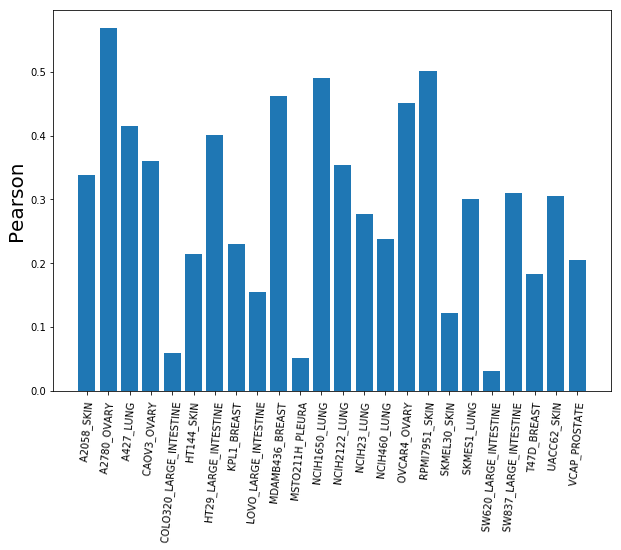

In [56]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=sens.columns, height=pccs)
plt.xticks(np.arange(len(pccs)),rotation=85)
plt.ylabel("Pearson",fontsize=20)
plt.savefig('3.png', dpi=500, bbox_inches = 'tight')

In [57]:
abs(data222-sens).max().max()

151.69494072356235

In [58]:
data222-sens

,A2058_SKIN,A2780_OVARY,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT144_SKIN,HT29_LARGE_INTESTINE,KPL1_BREAST,LOVO_LARGE_INTESTINE,MDAMB436_BREAST,...,NCIH460_LUNG,OVCAR4_OVARY,RPMI7951_SKIN,SKMEL30_SKIN,SKMES1_LUNG,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE
"'VINORELBINE', 'SUNITINIB'",-9.42525,1.69537,12.4814,-11.6716,21.3783,13.6477,-11.1555,12.1177,6.45985,2.40624,...,7.56814,-7.52573,-19.8362,6.50794,4.42114,17.1547,-0.112719,-12.9695,-4.27518,-8.42608
"'AZD1775', 'MK-4827'",21.2006,-4.79579,-3.25767,-10.4637,-14.2586,-4.28372,-1.28296,-9.1452,-3.15804,5.06167,...,-7.03548,48.1056,5.55976,3.40249,2.45812,-8.86428,8.55956,0.0777776,12.5864,-7.19829
"'VINORELBINE', 'DASATINIB'",-16.5268,33.809,31.7482,-16.4812,-7.25207,-53.5955,-3.39283,15.5297,56.5479,-0.389884,...,5.14213,13.0681,-8.39419,-20.6327,3.21953,26.4132,14.1427,38.4779,-26.7533,-12.9731
"'VINBLASTINE', 'MK-4827'",-6.66589,8.08609,-2.48319,-21.1872,27.0932,6.22134,12.142,18.9222,14.6114,7.18936,...,7.64924,-6.95453,-0.149557,6.23037,5.57602,47.2656,-7.47753,-40.8864,10.2251,38.8861
"'VINBLASTINE', 'AZD1775'",-0.398956,-8.3457,-19.7248,-9.33994,-7.23946,7.38858,-9.36855,7.26147,-2.21188,-10.4947,...,-16.8835,-6.08136,-14.4391,-23.8221,-16.2679,15.2179,-7.6111,-28.3006,8.48323,-18.9523
"'MK-4827', 'DASATINIB'",-13.3779,40.7105,0.310574,-5.54447,-3.20828,-72.6836,16.3462,-7.1633,29.6364,-3.59494,...,-24.8794,56.1842,-7.80509,-40.8187,-18.8623,25.5066,7.95358,-39.6592,-21.5941,17.1818
"'AZD1775', 'TOPOTECAN'",0.961839,-0.864616,5.12825,3.39203,-4.73004,7.52705,10.1326,10.8289,3.30484,-2.76266,...,-22.8733,36.869,-13.0323,10.9266,-13.9659,13.1473,4.82523,-0.786611,2.76671,-3.95029
"'VINORELBINE', 'AZD1775'",-20.5217,-14.6814,-11.3051,-15.4595,-1.72018,2.79477,-21.697,3.34274,0.488203,-7.86608,...,-8.85553,-19.0567,-18.4069,-9.3239,-13.3315,-5.12634,-14.9283,-18.8989,-7.44645,-38.0347
"'SUNITINIB', 'TOPOTECAN'",-8.63129,2.6151,10.9959,0.322713,4.74952,-6.50723,-18.1282,14.7515,-4.83597,-7.48336,...,-3.78208,-33.6278,-8.81152,6.16592,-6.10195,4.18477,-8.77847,-24.7815,-7.15558,7.98827
"'VINBLASTINE', 'DINACICLIB'",-17.2967,-16.7554,-14.5837,-30.141,2.9337,-12.5182,-18.5646,2.00085,-19.3425,-20.6328,...,-17.9537,-17.9531,-10.7423,-6.47287,-26.6906,14.2658,-15.2935,-58.8383,0.0685188,-11.2802


In [19]:
cz = []
for column1,line1 in data222.iteritems():
    for column2,line2 in sens.iteritems():
        if column1 == column2:
            tp = np.array(line2)-np.array(line1)
            for i in tp:
                cz.append(i)

In [20]:
import pyecharts.options as opts
from pyecharts.charts import Scatter                

x_data = cz
y_data = cz

(
    Scatter(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol_size=4,
        label_opts=opts.LabelOpts(is_show=False)
    )
    .set_series_opts()
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
    )
    .render("basic_scatter_chart.html")
)

ModuleNotFoundError: No module named 'pyecharts'

In [ ]:
data222.count().count()